Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
# reading the data from the saved CSV files
# tweet consists the original data without any changes

tweet = pd.read_csv('/content/tweet.csv')
tweet_1 = pd.read_csv('/content/First_tweets.csv')
tweet_2 = pd.read_csv('/content/Last_tweets.csv')
tweet_3 = pd.read_csv('/content/Unique_tweets.csv')

Working with raw data without any removal of duplicates


As we know, tweets comprise of Hash tags (#) and Person Taggings(@), finding out their importance
---



## Hash Tag Analysis

In [6]:
hashtags_words = tweet['tweets'].apply(lambda x: re.findall(r'#\w+', x))
hashtags_words

0        [#staylight, #staywhite, #sarcastic, #moralnee...
1                    [#sarcasm, #people, #diy, #artattack]
2        [#DailyMail, #shocker, #sarcastic, #dailyfail,...
3                                               [#sarcasm]
4                                             [#sarcastic]
                               ...                        
81403                [#childhood, #cool, #funny, #sarcasm]
81404                                   [#Jokes, #Sarcasm]
81405                                   [#urock, #sarcasm]
81406                                           [#sarcasm]
81407                                           [#sarcasm]
Name: tweets, Length: 81408, dtype: object

In [20]:
# Extracting words starting with the symbol '#' and creating a data frame with respect to the category

hash_no_hash = hashtags_words.apply(lambda lst: [item.replace('#', '') for item in lst])
hash_ana = pd.DataFrame({'class':tweet['class'], "tweets" : hash_no_hash})
hash_ana.reset_index(drop=True, inplace= True)
hash_ana.head(10)

,class,tweets
0,figurative,"[staylight, staywhite, sarcastic, moralneeded]"
1,figurative,"[sarcasm, people, diy, artattack]"
2,figurative,"[DailyMail, shocker, sarcastic, dailyfail, inH..."
3,figurative,[sarcasm]
4,figurative,[sarcastic]
5,figurative,"[Irony, TimesChange]"
6,figurative,"[Sarcasm, MovieFights]"
7,figurative,[sarcasm]
8,figurative,[sarcasm]
9,figurative,"[BajrangiBhaijaan, sarcasm]"


In [10]:
# Join the words within the lists and count word frequencies

total_hash_words = [word.lower() for inner_list in hash_ana['tweets'] for word in inner_list]
wordfreqdist_hash = nltk.FreqDist(total_hash_words)
mostcommon_hash = wordfreqdist_hash.most_common(100)
mostcommon_hash

[('sarcasm', 29737),
 ('irony', 23721),
 ('ironic', 7870),
 ('news', 2770),
 ('humor', 2758),
 ('peace', 2722),
 ('education', 2645),
 ('politics', 2543),
 ('late', 2539),
 ('drugs', 2430),
 ('gopdebate', 1785),
 ('sarcastic', 1680),
 ('funny', 1473),
 ('lol', 923),
 ('love', 638),
 ('tech', 527),
 ('inspirational', 444),
 ('design', 427),
 ('gop', 405),
 ('tcot', 395),
 ('long', 369),
 ('life', 348),
 ('quote', 265),
 ('fun', 260),
 ('health', 253),
 ('bb17', 232),
 ('quotes', 219),
 ('art', 208),
 ('truth', 192),
 ('business', 190),
 ('funnypictures', 189),
 ('funnytweets', 181),
 ('trump', 179),
 ('music', 177),
 ('meme', 177),
 ('cnndebate', 174),
 ('night', 174),
 ('internet', 170),
 ('pain', 168),
 ('wtf', 159),
 ('auspol', 157),
 ('writing', 156),
 ('usa', 155),
 ('cdnpoli', 153),
 ('jokes', 149),
 ('ccot', 145),
 ('comedy', 143),
 ('joke', 138),
 ('world', 135),
 ('us', 130),
 ('donaldtrump', 128),
 ('india', 127),
 ('kimdavis', 127),
 ('teaparty', 123),
 ('food', 122),
 ('offb

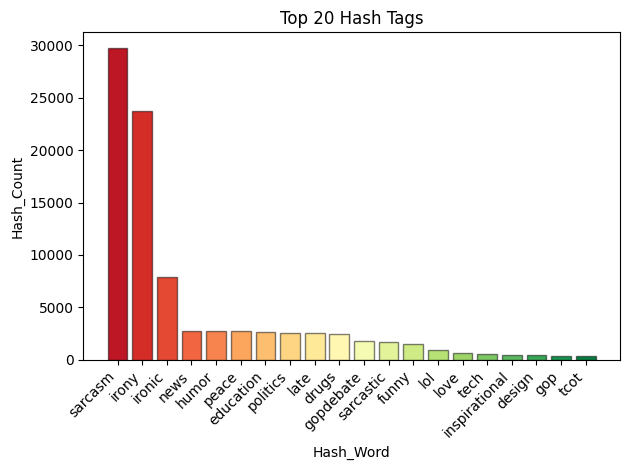

In [11]:
n_colors = 20
colors = sns.color_palette('RdYlGn', n_colors=n_colors)
top_words_hash = [word for word, count in mostcommon_hash[:20]]
word_counts_hash = [count for word, count in mostcommon_hash[:20]]

bars = plt.bar(top_words_hash, word_counts_hash, color=colors, edgecolor='k', linewidth=2)

# Adding shadow effect
for bar in bars:
    bar.set_edgecolor((0, 0, 0, 0.5))
    bar.set_linewidth(1)

plt.xlabel('Hash_Word')
plt.ylabel('Hash_Count')
plt.title('Top 20 Hash Tags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# List of unique classes
unique_classes = hash_ana['class'].unique()

# Create separate data frames for each class
hash_dataframes = {cls: hash_ana[hash_ana['class'] == cls].copy() for cls in unique_classes}

hash_figurative = pd.DataFrame(hash_dataframes['figurative'])
hash_irony  = pd.DataFrame(hash_dataframes['irony'])
hash_regular  = pd.DataFrame(hash_dataframes['regular'])
hash_sarcasm = pd.DataFrame(hash_dataframes['sarcasm'])
hash_figurative = hash_figurative.drop(['class'], axis=1)
hash_irony = hash_irony.drop(['class'], axis=1)
hash_regular = hash_regular.drop(['class'], axis=1)
hash_sarcasm = hash_sarcasm.drop(['class'], axis=1)

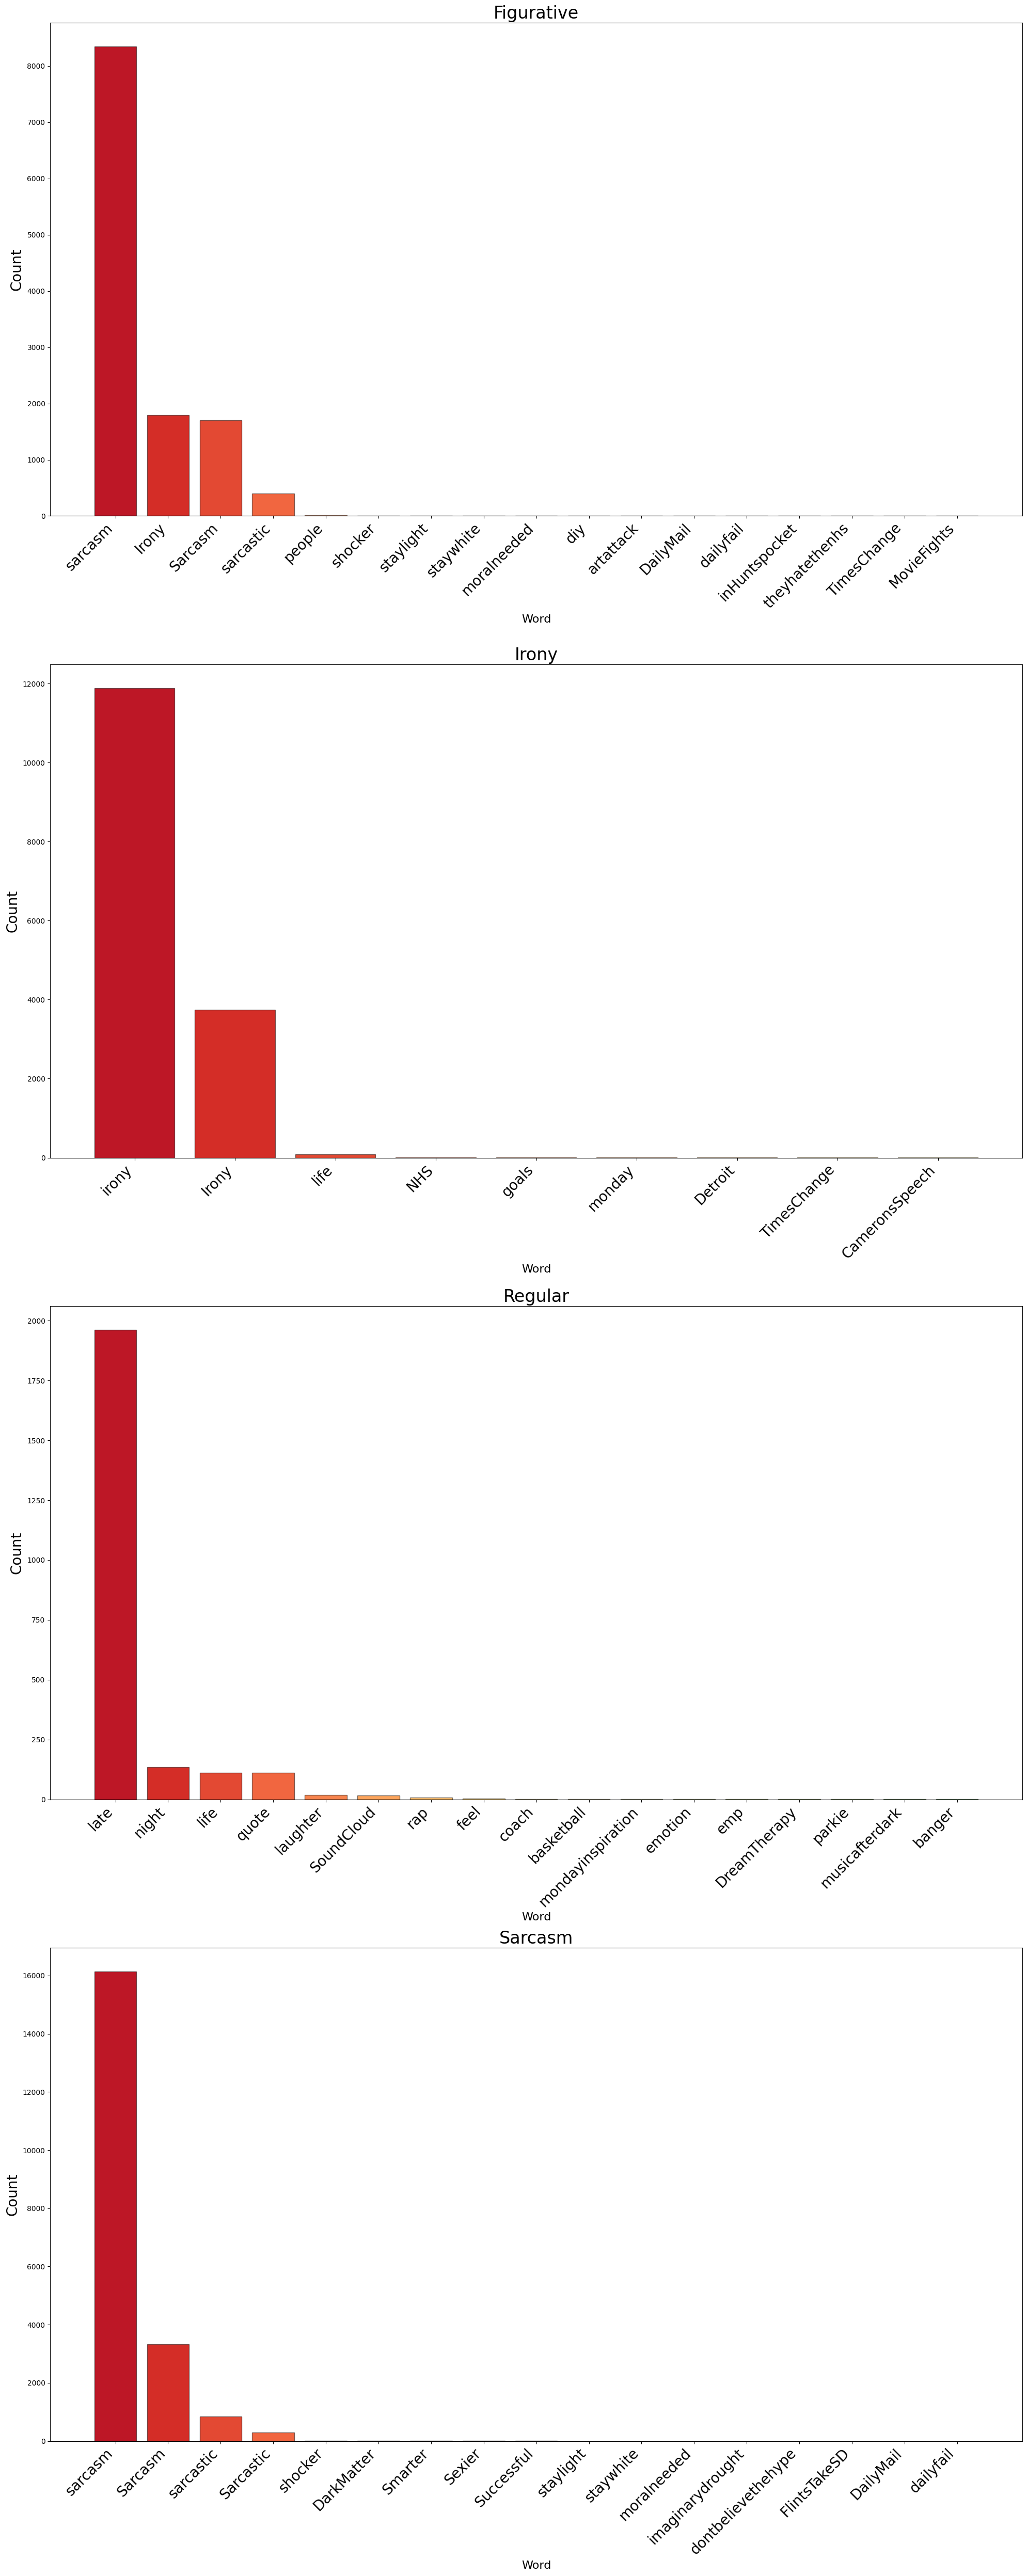

In [25]:
n_colors = 20
colors = sns.color_palette('RdYlGn', n_colors=n_colors)

def plot_bar_chart(ax, hash_df, title):
    valid_tweets = [sublist for sublist in hash_df['tweets'] if isinstance(sublist, list)]
    top_words = [word for sublist in valid_tweets for word in sublist if len(word) > 0][:20]

    word_counts = {word: sum(sublist.count(word) for sublist in valid_tweets) for word in top_words}

    # Sort words by their counts in descending order
    sorted_words = sorted(word_counts.keys(), key=lambda x: word_counts[x], reverse=True)
    sorted_word_counts = [word_counts[word] for word in sorted_words]

    bars = ax.bar(sorted_words[:20], sorted_word_counts, color=colors, edgecolor='k', linewidth=2)

    for bar in bars:
        bar.set_edgecolor((0, 0, 0, 0.5))
        bar.set_linewidth(1)

    ax.set_title(title,fontsize=24)
    ax.set_xlabel('Word',fontsize=16)
    ax.set_ylabel('Count',fontsize=20)
    ax.set_xticklabels(sorted_words[:20], rotation=45, ha='right')
    ax.tick_params(axis='x', labelsize=20)

fig, axes = plt.subplots(4, 1, figsize=(20, 50))
axes = axes.flatten()

plot_bar_chart(axes[0], hash_figurative, 'Figurative')
plot_bar_chart(axes[1], hash_irony, 'Irony')
plot_bar_chart(axes[2], hash_regular, 'Regular')
plot_bar_chart(axes[3], hash_sarcasm, 'Sarcasm')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Based on the above plots, it can be concluded that Hash tags are tagged with respect to that particular class and there are only 1 or 2 which are high and rest are very low, hence its importance is negligable

## Person Tagging Analysis

In [15]:
tagged_words = tweet['tweets'].apply(lambda x: re.findall(r'@\w+', x))
tagged_words

0                                     []
1                                     []
2          [@IminworkJeremy, @medsingle]
3                                [@wilw]
4        [@TeacherArthurG, @rweingarten]
                      ...               
81403                                 []
81404                                 []
81405                                 []
81406                                 []
81407                        [@skeyno16]
Name: tweets, Length: 81408, dtype: object

In [16]:
tagged_no = tagged_words.apply(lambda lst: [item.replace('@', '') for item in lst])
tagged_no

0                                   []
1                                   []
2          [IminworkJeremy, medsingle]
3                               [wilw]
4        [TeacherArthurG, rweingarten]
                     ...              
81403                               []
81404                               []
81405                               []
81406                               []
81407                       [skeyno16]
Name: tweets, Length: 81408, dtype: object

In [17]:
tagged_ana = pd.DataFrame({'class':tweet['class'], "tweets" : tagged_no})
tagged_ana.reset_index(drop=True, inplace= True)
tagged_ana.head(10)

,class,tweets
0,figurative,[]
1,figurative,[]
2,figurative,"[IminworkJeremy, medsingle]"
3,figurative,[wilw]
4,figurative,"[TeacherArthurG, rweingarten]"
5,figurative,[]
6,figurative,"[andysignore, MurrellDan]"
7,figurative,[]
8,figurative,[raaachf]
9,figurative,[]


In [18]:
# Join the words within the lists and count word frequencies
total_tagged = [word.lower() for inner_list in tagged_ana['tweets'] for word in inner_list]
wordfreqdist_tagged = nltk.FreqDist(total_tagged)
mostcommon_tagged = wordfreqdist_tagged.most_common()
mostcommon_tagged[0:20]

[('realdonaldtrump', 319),
 ('cnn', 178),
 ('foxnews', 146),
 ('hillaryclinton', 93),
 ('potus', 88),
 ('youtube', 83),
 ('gop', 77),
 ('carlyfiorina', 72),
 ('alanis', 69),
 ('etsy', 66),
 ('nytimes', 64),
 ('ltcartoons', 63),
 ('nfl', 51),
 ('twitter', 50),
 ('megynkelly', 46),
 ('jebbush', 44),
 ('pmharper', 42),
 ('taylorswift13', 42),
 ('realbencarson', 42),
 ('ppact', 39)]

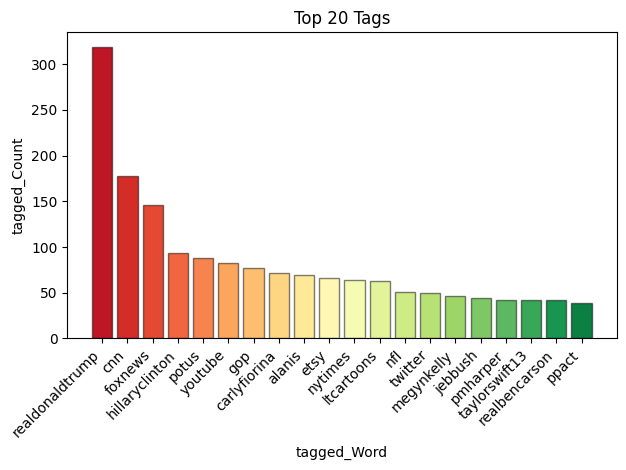

In [19]:
n_colors = 20
colors = sns.color_palette('RdYlGn', n_colors=n_colors)
top_words_tagged = [word for word, count in mostcommon_tagged[:20]]
word_counts_tagged = [count for word, count in mostcommon_tagged[:20]]

bars = plt.bar(top_words_tagged, word_counts_tagged, color=colors, edgecolor='k', linewidth=2)

# Adding shadow effect
for bar in bars:
    bar.set_edgecolor((0, 0, 0, 0.5))
    bar.set_linewidth(1)

plt.xlabel('tagged_Word')
plt.ylabel('tagged_Count')
plt.title('Top 20 Tags')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # To avoid overlapping labels
plt.show()

* There are very few person tags in number, hence there is no need of futher analysis

* It can be concluded that there is not much of importance on Hash tags and Person taggings